In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
with zipfile.ZipFile('archive.zip', 'r') as file:
    file.extractall('')
    
df = pd.read_csv('song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


<Figure size 864x864 with 0 Axes>

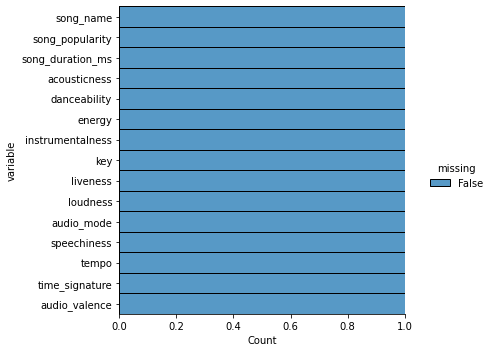

In [3]:
plt.figure(figsize = (12, 12))
sns.displot(
    data = df.isna().melt(value_name = 'missing'),
    y = 'variable',
    hue = 'missing',
    multiple = 'fill',
    aspect = 1.2
)

plt.show()

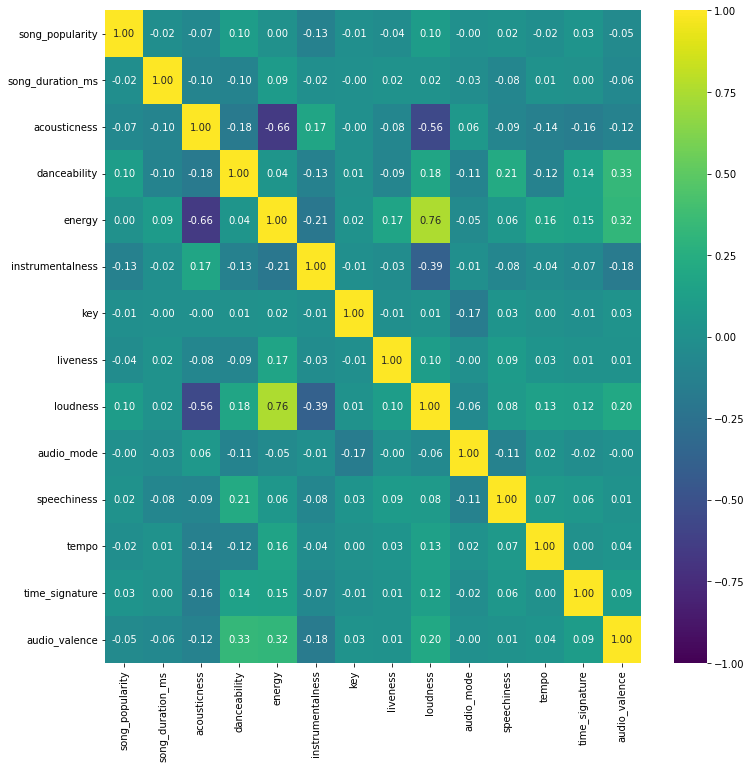

In [4]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.heatmap(
    data = corr,
    annot = True,
    cmap = 'viridis',
    vmax = 1.0,
    vmin = -1.0,
    fmt = '.2f'
    )

In [5]:
df['song_duration_ms'] = (df['song_duration_ms'] / 1000).round()
df.rename(columns = {'song_duration_ms': 'song_duration_s'}, inplace = True)

In [6]:
to_convert = [df['acousticness'], df['danceability'], df['energy'], df['instrumentalness'], df['liveness'], df['audio_mode'],
              df['speechiness'], df['audio_valence']]

def convert_to_percent(data_to_convert):
    for variable in data_to_convert:
        variable *= 100
    return data_to_convert

convert_to_percent(to_convert)

[0         0.5520
 1         1.0300
 2         0.8170
 3         2.6400
 4         0.0954
           ...   
 18830    89.3000
 18831    76.5000
 18832    84.7000
 18833    94.5000
 18834    91.1000
 Name: acousticness, Length: 18835, dtype: float64,
 0        49.6
 1        54.2
 2        73.7
 3        45.1
 4        44.7
          ... 
 18830    50.0
 18831    49.5
 18832    71.9
 18833    48.8
 18834    64.0
 Name: danceability, Length: 18835, dtype: float64,
 0        68.2
 1        85.3
 2        46.3
 3        97.0
 4        76.6
          ... 
 18830    15.1
 18831    16.1
 18832    32.5
 18833    32.6
 18834    38.1
 Name: energy, Length: 18835, dtype: float64,
 0         0.002940
 1         0.000000
 2        44.700000
 3         0.355000
 4         0.000000
            ...    
 18830     0.006540
 18831     0.000133
 18832     0.000000
 18833     1.570000
 18834     0.025400
 Name: instrumentalness, Length: 18835, dtype: float64,
 0         5.89
 1        10.80
 2        25.5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_s   18835 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 2.2+ MB


In [8]:
df.describe().round(2)

,song_popularity,song_duration_s,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00
mean,52.99,218.21,25.85,63.33,64.50,7.80,5.29,17.97,-7.45,62.81,10.21,121.07,3.96,52.80
std,21.91,59.89,28.87,15.67,21.41,22.16,3.61,14.40,3.83,48.33,10.44,28.71,0.30,24.46
min,0.00,12.00,0.00,0.00,0.11,0.00,0.00,1.09,-38.77,0.00,0.00,0.00,0.00,0.00
25%,40.00,184.00,2.41,53.30,51.00,0.00,2.00,9.29,-9.04,0.00,3.78,98.37,4.00,33.50
50%,56.00,211.00,13.20,64.50,67.40,0.00,5.00,12.20,-6.56,100.00,5.55,120.01,4.00,52.70
75%,69.00,243.00,42.40,74.80,81.50,0.26,8.00,22.10,-4.91,100.00,11.90,139.93,4.00,72.50
max,100.00,1799.00,99.60,98.70,99.90,99.70,11.00,98.60,1.58,100.00,94.10,242.32,5.00,98.40


In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]